# 155_A / THK / Level Adjustment / Auswahl DC Motor
Status 03-Sep-2019
Gerrit Kocherscheidt

* Berechnung Getriebe-Motor
* Einarbeitung der Vorschläge von William vom 02-Mai-2019


In [1]:
import numpy as np
from MotorCalc import *

## Getriebemotor 997 (19:1)

voltage constant = 748RPM/V


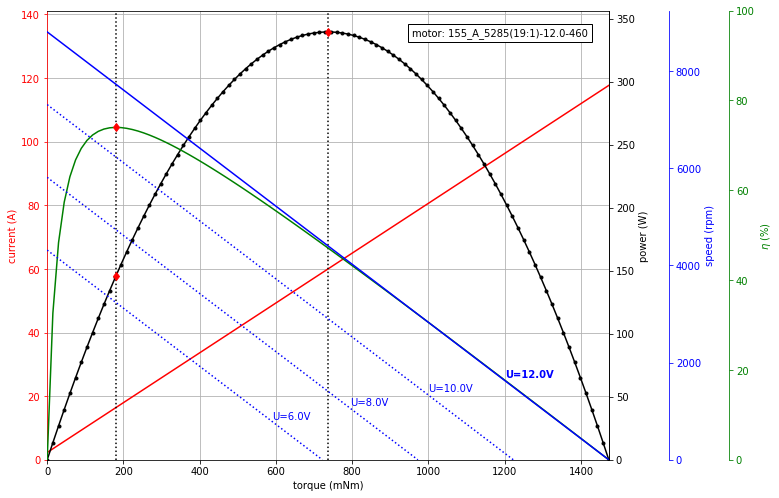

In [2]:
U_N = 12
I_S = 117.676
I_0 = 2.3                #Wert von Motor Datenblatt
n_WP_system = 400
M_WP_system = 1.4
M_S = 14.524 * 9.81 * 0.01
GB_ratio = 19.0
GB_eta = 0.7  #Wert geschätzt, um etwa die Daten von Nichibo für das System erhalten
GB_name = '19:1'
# k_M_GB = 1.873 * 9.81 * 0.01 #Nm/A
# k_M = k_M_GB / GB_ratio / GB_eta
k_M =  0.1229*9.81*0.01*1.0589
R = U_N / I_S
# I_0 = 1.9 / GB_eta     #Wert geschätzt, um etwa die Daten von Nichibo für das System zu erhalten

# R = 0.1372
motor_name_Nichibo = '97-9010W-R-NF-EN'
motor_name_KOCO = '155_A_5285(19:1)-12.0-460'
GBMotor = CDCMotorWithGearbox(U_N=12, k_M=k_M, I_0=I_0, R=R, GB_eta=GB_eta, GB_ratio=GB_ratio, GB_name=GB_name, motor_name=motor_name_KOCO)
GBMotor.plotCurves(addVoltagesSpeed=(6,8,10))

In [3]:
GBMotor.print_parameter()


input parameter
parameter	voltage		term. resist.	no-load cur.	no-load speed	torque const.
unit		Volt		Ohm		Ampere		RPM		Nm/A
value		12.0		0.10		2.300		8800		0.013

motor performance data:
parameter	unit	no-load		@max eff.	@max power	stall
speed		RPM	8800		7721		4400		0
current		A	2.300		16.452		59.988		117.676
torque		Nm	0.029		0.181		0.736		1.473
Power		W	0.00		146.08		339.36		0.00
eff.		%	0.0		74.0		47.1		0.0

gearbox input parameter
parameter	red. ratio	gb efficiency
unit		-		%
value		19.0:1		70.0

system performance data:
parameter	unit	no-load		@max eff.	@max power	stall
speed		RPM	463		406		232		0
current		A	1.610		11.516		41.992		82.373
torque		Nm	0.391		2.403		9.795		19.590
Power		W	0.00		102.25		237.55		0.00
eff.		%	0.0		51.8		0.3		0.0


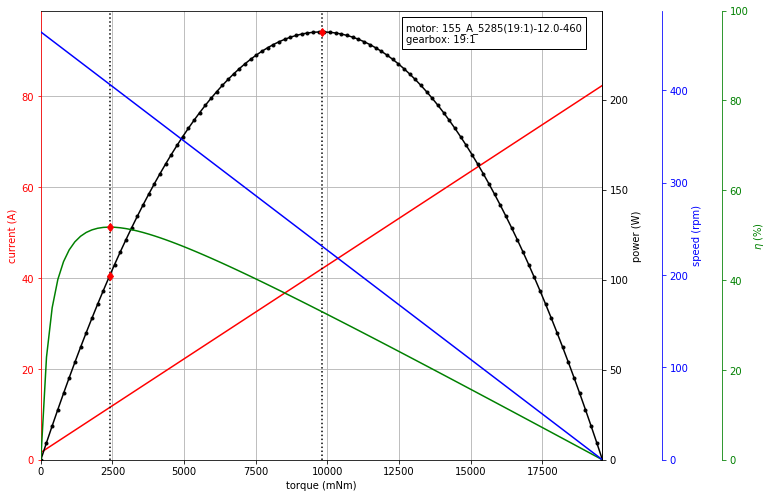

In [4]:
GBMotor.plotSystemCurves()

## Anforderungen simpler Motor

In [5]:
U_N=12
n_WP=6000
M_WP=0.100
P_mech_des=n_WP*M_WP*np.pi/30
print('M_WP = {:0.3f}Nm'.format(M_WP))

M_WP = 0.100Nm


## KBV5BFN-4529S-WRC-NF/87

In [6]:
## Data Sheet Nichibo
U_N_KN = 12
I_S_KN = 23.469
M_S_KN = 3155.014*9.81E-5
I_0_KN = 0.65
motor_name_supplier = 'KBV5BFN-4529S-WRC-NF/87'
motor_name_KOCO = '3857-N3B-88-12.0-155A'


In [7]:
#Terminal resistance
R=U_N_KN / I_S_KN
#Operating voltage
U=16
#No load current
I_0 = I_0_KN / U_N_KN * U
#Torque konstant
k_M = M_S_KN / I_S_KN

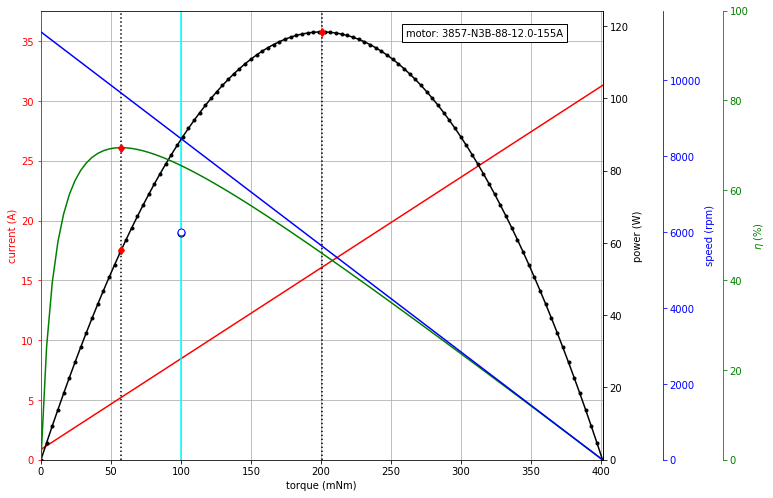

R = 0.51 Ohm
U = 16.00 V
I_0 = 0.87 A
k_M = 13.19 mNm/A
n = 8457.2 RPM
I = 8.4 A
W_mech = 88.56 W
W_loss = 46.63 W


In [8]:
m=CDCMotor(U_N=U,R=R,I_0=I_0,k_M=k_M, M_WP = M_WP, n_WP = n_WP, motor_name=motor_name_KOCO)
m.plotCurves()

#Print values
print('R = {:0.2f} Ohm'.format(R))
print('U = {:0.2f} V'.format(U))
print('I_0 = {:0.2f} A'.format(I_0))
print('k_M = {:0.2f} mNm/A'.format(k_M*1000.0))
print('n = {:0.1f} RPM'.format(m.calc_n_from_M(M_WP)))
print('I = {:0.1f} A'.format(m.calc_I_from_M(M_WP)))
print('W_mech = {:0.2f} W'.format(m.calc_P_mech_from_M(M_WP)))
print('W_loss = {:0.2f} W'.format(m.calc_P_el_from_M(M_WP)-m.calc_P_mech_from_M(M_WP)))

## KV5FN-5025B-RC-74

In [9]:
## Data Sheet Nichibo
U_N_KN = 12
I_S_KN = 32.042
M_S_KN = 3930*9.81E-5
I_0_KN = 0.76
motor_name_supplier = 'KV5FN-5025B-RC-74'
motor_name_KOCO = '3857-N3B-89-12.0-155A'

In [10]:
#Terminal resistance
R=U_N_KN / I_S_KN
#Operating voltage
U=12
#No load current
I_0 = I_0_KN / U_N_KN * U
#Torque konstant
k_M = M_S_KN / I_S_KN

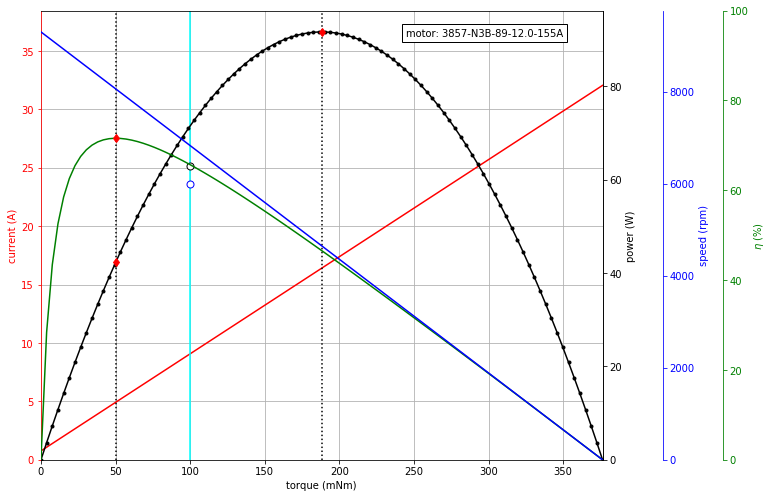

R = 0.37 Ohm
U = 12.00 V
I_0 = 0.76 A
k_M = 12.03 mNm/A
n = 6827.6 RPM
I = 9.1 A
W_mech = 71.50 W
W_loss = 37.35 W


In [11]:
m=CDCMotor(U_N=U,R=R,I_0=I_0,k_M=k_M, M_WP = M_WP, n_WP = n_WP, motor_name=motor_name_KOCO)
m.plotCurves()

#Print values
print('R = {:0.2f} Ohm'.format(R))
print('U = {:0.2f} V'.format(U))
print('I_0 = {:0.2f} A'.format(I_0))
print('k_M = {:0.2f} mNm/A'.format(k_M*1000.0))
print('n = {:0.1f} RPM'.format(m.calc_n_from_M(M_WP)))
print('I = {:0.1f} A'.format(m.calc_I_from_M(M_WP)))
print('W_mech = {:0.2f} W'.format(m.calc_P_mech_from_M(M_WP)))
print('W_loss = {:0.2f} W'.format(m.calc_P_el_from_M(M_WP)-m.calc_P_mech_from_M(M_WP)))

### Tabelle mit Motor-Parametern

| Name | Unit | Value | Comment
|:---|:---:|:---:|:---
|**Input parameter**
|$U_{\rm{N}}$| V | {{m.U_N}} | rated Voltage
|$I_0$|A|{{m.I_0}}| no load current
|$k_{\rm{M}}$|mNm/A|{{"{:0.2f}".format(m.k_M*1000)}}| torque constant
|$R$|$\Omega$|{{"{:0.2f}".format(m.R)}}|terminal resistance
|**Output parameter**
|$I_{\rm{S}}$|A|{{"{:0.2f}".format(m.I_S)}}| stall current
|$I_{\rm{meff}}$|A|{{"{:0.2f}".format(m.I_meff)}}|current @ $\eta_{\rm{max}}$
|$n_0$|min$^{-1}$|{{"{:0.0f}".format(m.n_0)}}| no load speed
|$n_{\rm{meff}}$|min$^{-1}$|{{"{:0.0f}".format(m.n_meff)}}| speed @ $\eta_{\rm{max}}$
|$M_{\rm{S}}$|mNm|{{"{:0.2f}".format(m.M_S*1000)}}| stall torque
|$M_{\rm{0}}$|mNm|{{"{:0.2f}".format(m.M_0*1000)}}| loss torque
|$M_{\rm{meff}}$|mNm|{{"{:0.2f}".format(m.M_meff*1000)}}| torque @ $\eta_{\rm{max}}$
|$M_{\rm{max power}}$|mNm|{{"{:0.2f}".format(m.M_maxpower*1000)}}| torque @ $P_{\rm{max}}$
|$P_{\rm{meff}}$|W|{{"{:0.2f}".format(m.P_meff)}}| power @ $\eta_{\rm{max}}$
|$P_{\rm{max}}$|W|{{"{:0.2f}".format(m.P_maxpower)}}| max. power
|$\eta_{\rm{max}}$| % | {{"{:0.2f}".format(m.eta_max*100.0)}} | max. efficiency

## NC3SFN-6035

In [12]:
## Data Sheet Nichibo
U_N_KN = 12
I_S_KN = 51.36
M_S_KN = 4557*9.81E-5
I_0_KN = 1.0
motor_name_supplier = 'NC3SFN-6035'
motor_name_KOCO = '3865-N3B-100-12.0-155A'


In [13]:
#Terminal resistance
R=U_N_KN / I_S_KN
#Operating voltage
U=16
#No load current
I_0 = I_0_KN / U_N_KN * U
#Torque konstant
k_M = M_S_KN / I_S_KN

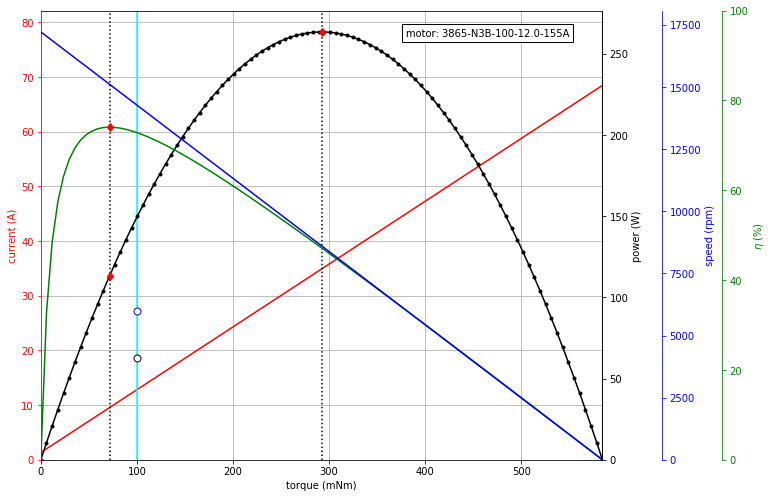

R = 0.23 Ohm
U = 16.00 V
I_0 = 1.33 A
k_M = 8.70 mNm/A
n = 14266.9 RPM
I = 12.8 A
W_mech = 149.40 W
W_loss = 55.75 W


In [14]:
m=CDCMotor(U_N=U,R=R,I_0=I_0,k_M=k_M, M_WP = M_WP, n_WP = n_WP, motor_name=motor_name_KOCO)
m.plotCurves()

#Print values
print('R = {:0.2f} Ohm'.format(R))
print('U = {:0.2f} V'.format(U))
print('I_0 = {:0.2f} A'.format(I_0))
print('k_M = {:0.2f} mNm/A'.format(k_M*1000.0))
print('n = {:0.1f} RPM'.format(m.calc_n_from_M(M_WP)))
print('I = {:0.1f} A'.format(m.calc_I_from_M(M_WP)))
print('W_mech = {:0.2f} W'.format(m.calc_P_mech_from_M(M_WP)))
print('W_loss = {:0.2f} W'.format(m.calc_P_el_from_M(M_WP)-m.calc_P_mech_from_M(M_WP)))

## KV5FN-6015F

In [15]:
## Data Sheet Nichibo
U_N_KN = 14.4
I_S_KN = 73.86
M_S_KN = 5161*9.81E-5
I_0_KN = 1.7
motor_name_supplier = 'KV5FN-6015F'
motor_name_KOCO = '3957-N5B-125-12.0-155A'

In [16]:
#Terminal resistance
R=U_N_KN / I_S_KN
#Operating voltage
U=16
#No load current
I_0 = I_0_KN / U_N_KN * U
#Torque konstant
k_M = M_S_KN / I_S_KN

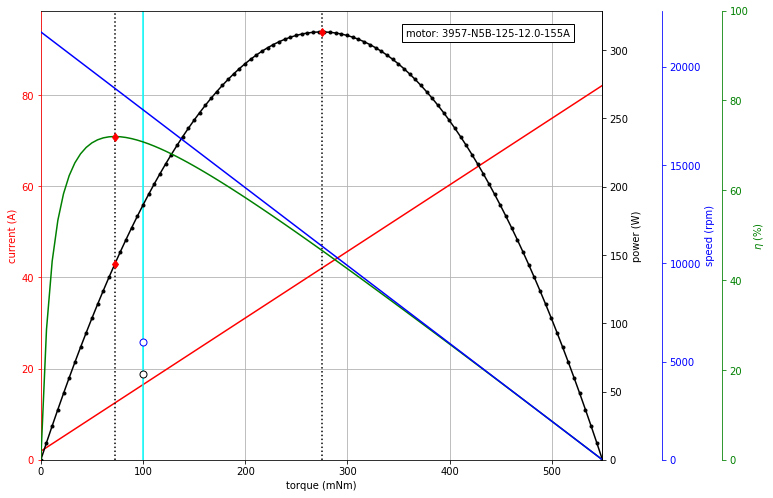

R = 0.19 Ohm
U = 16.00 V
I_0 = 1.89 A
k_M = 6.85 mNm/A
n = 17814.1 RPM
I = 16.5 A
W_mech = 186.55 W
W_loss = 77.09 W


In [17]:
m=CDCMotor(U_N=U,R=R,I_0=I_0,k_M=k_M, M_WP = M_WP, n_WP = n_WP, motor_name=motor_name_KOCO)
m.plotCurves()

#Print values
print('R = {:0.2f} Ohm'.format(R))
print('U = {:0.2f} V'.format(U))
print('I_0 = {:0.2f} A'.format(I_0))
print('k_M = {:0.2f} mNm/A'.format(k_M*1000.0))
print('n = {:0.1f} RPM'.format(m.calc_n_from_M(M_WP)))
print('I = {:0.1f} A'.format(m.calc_I_from_M(M_WP)))
print('W_mech = {:0.2f} W'.format(m.calc_P_mech_from_M(M_WP)))
print('W_loss = {:0.2f} W'.format(m.calc_P_el_from_M(M_WP)-m.calc_P_mech_from_M(M_WP)))

## KV5FN-5021F-CE-IE 

In [18]:
## Data Sheet Nichibo
U_N_KN = 14.4
I_S_KN = 43.23
M_S_KN = 4458*9.81E-5
I_0_KN = 0.83
motor_name_supplier = 'KV5FN-5021F-CE-IE'
motor_name_KOCO = '3957-N5B-81-12.0-155A'

In [19]:
#Terminal resistance
R=U_N_KN / I_S_KN
#Operating voltage
U=12
#No load current
I_0 = I_0_KN / U_N_KN * U
#Torque konstant
k_M = M_S_KN / I_S_KN

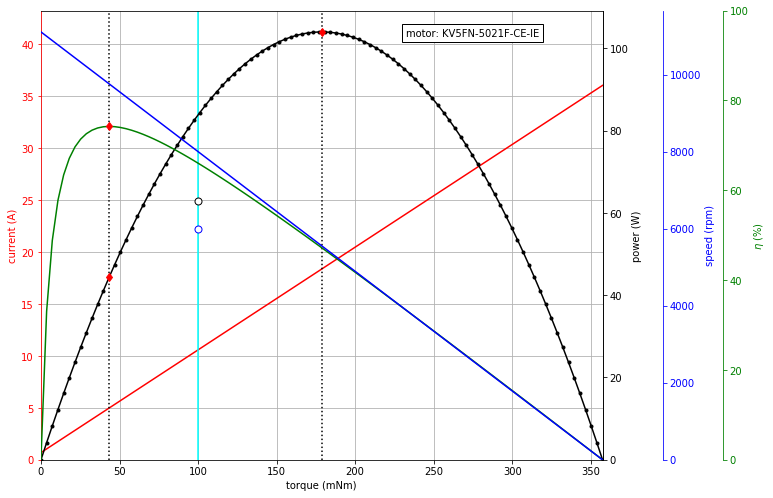

R = 0.33 Ohm
U = 12.00 V
I_0 = 0.69 A
k_M = 10.12 mNm/A
n = 8001.7 RPM
I = 10.6 A
W_mech = 83.79 W
W_loss = 43.13 W


In [20]:
m=CDCMotor(U_N=U,R=R,I_0=I_0,k_M=k_M, M_WP = M_WP, n_WP = n_WP, motor_name=motor_name_supplier)
m.plotCurves()

#Print values
print('R = {:0.2f} Ohm'.format(R))
print('U = {:0.2f} V'.format(U))
print('I_0 = {:0.2f} A'.format(I_0))
print('k_M = {:0.2f} mNm/A'.format(k_M*1000.0))
print('n = {:0.1f} RPM'.format(m.calc_n_from_M(M_WP)))
print('I = {:0.1f} A'.format(m.calc_I_from_M(M_WP)))
print('W_mech = {:0.2f} W'.format(m.calc_P_mech_from_M(M_WP)))
print('W_loss = {:0.2f} W'.format(m.calc_P_el_from_M(M_WP)-m.calc_P_mech_from_M(M_WP)))

## 997-7018-R

In [21]:
## Data Sheet Nichibo
U_N_KN = 12.0
I_S_KN = 48.12
M_S_KN = 11499*9.81E-5
I_0_KN = 1.4
motor_name_supplier = '997-7018-R'
motor_name_KOCO = '5585-NXB-43-12.0-155A'

In [22]:
#Terminal resistance
R=U_N_KN / I_S_KN
#Operating voltage
U=16
#No load current
I_0 = I_0_KN / U_N_KN * U
#Torque konstant
k_M = M_S_KN / I_S_KN

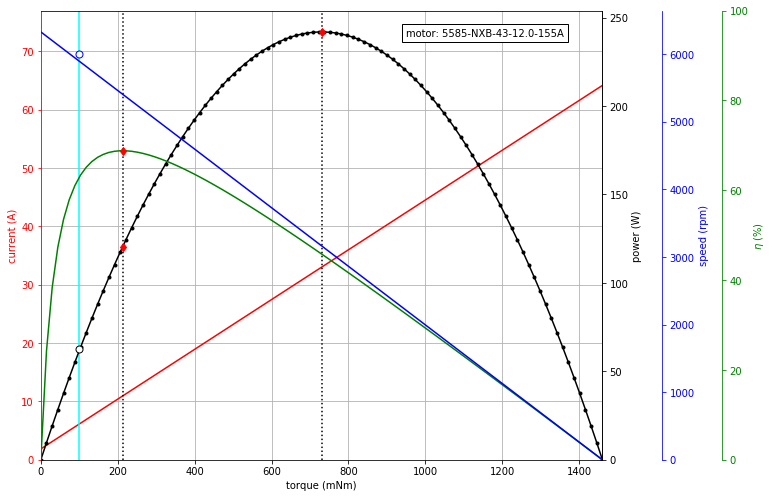

R = 0.25 Ohm
U = 16.00 V
I_0 = 1.87 A
k_M = 23.44 mNm/A
n = 5894.6 RPM
I = 6.1 A
W_mech = 61.73 W
W_loss = 36.39 W


In [23]:
m=CDCMotor(U_N=U,R=R,I_0=I_0,k_M=k_M, M_WP = M_WP, n_WP = n_WP, motor_name=motor_name_KOCO)
m.plotCurves()

#Print values
print('R = {:0.2f} Ohm'.format(R))
print('U = {:0.2f} V'.format(U))
print('I_0 = {:0.2f} A'.format(I_0))
print('k_M = {:0.2f} mNm/A'.format(k_M*1000.0))
print('n = {:0.1f} RPM'.format(m.calc_n_from_M(M_WP)))
print('I = {:0.1f} A'.format(m.calc_I_from_M(M_WP)))
print('W_mech = {:0.2f} W'.format(m.calc_P_mech_from_M(M_WP)))
print('W_loss = {:0.2f} W'.format(m.calc_P_el_from_M(M_WP)-m.calc_P_mech_from_M(M_WP)))